<a href="https://colab.research.google.com/github/Dicti93/MLSEM/blob/master/3.%20Data%20Preparation/Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install ucimlrepo

In [20]:
# Standard imports
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Specific library import for fetching datasets
from ucimlrepo import fetch_ucirepo

# scikit-learn imports for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline

In [21]:
# Adjust the display settings to increase the width
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Do not wrap DataFrame horizontally
pd.set_option('display.width', 240)  # Set the maximum width of the display

In [22]:
# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
features = regensburg_pediatric_appendicitis.data.features
targets = regensburg_pediatric_appendicitis.data.targets

# metadata
print(regensburg_pediatric_appendicitis.metadata)

# variable information
print(regensburg_pediatric_appendicitis.variables)

{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

In [23]:
# Print the basic info of the features DataFrame
features.info()

# Print the basic info of the targets DataFrame
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [24]:
# Display the first 5 rows of the features DataFrame
print(features.head())

# Display the first 5 rows of the targets DataFrame
print(targets.head())

     Age   BMI     Sex  Height  Weight  Length_of_Stay  Alvarado_Score  Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter Migratory_Pain Lower_Right_Abd_Pain Contralateral_Rebound_Tenderness Coughing_Pain Nausea Loss_of_Appetite  Body_Temperature  WBC_Count  Neutrophil_Percentage  Segmented_Neutrophils Neutrophilia  RBC_Count  Hemoglobin   RDW  Thrombocyte_Count Ketones_in_Urine RBC_in_Urine WBC_in_Urine  CRP Dysuria         Stool Peritonitis Psoas_Sign Ipsilateral_Rebound_Tenderness US_Performed Free_Fluids Appendix_Wall_Layers Target_Sign Appendicolith Perfusion Perforation Surrounding_Tissue_Reaction Appendicular_Abscess Abscess_Location Pathological_Lymph_Nodes Lymph_Nodes_Location Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis Meteorism Enteritis Gynecological_Findings
0  12.68  16.9  female   148.0    37.0             3.0             4.0                            3.0            yes                7.1             no                  yes         

In [25]:
# Print all feature names
print(features.columns)

# Print all target names
print(targets.columns)

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
       'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'Ketones_in_Urine',
       'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign', 'Appendicolith', 'Perfusion',
       'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess', 'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location', 'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus', 'Coprostasis',
       'Meteorism', 'Enteritis', 'Gynecological_Findings'],
      dtype='object'

In [26]:
# Print unique values for each feature column
for col in features.columns:
    print(f"{col} has {features[col].nunique()} unique values")

# For targets, especially if they are categorical
for col in targets.columns:
    print(f"{col} has {targets[col].nunique()} unique values")

Age has 577 unique values
BMI has 510 unique values
Sex has 2 unique values
Height has 187 unique values
Weight has 268 unique values
Length_of_Stay has 19 unique values
Alvarado_Score has 11 unique values
Paedriatic_Appendicitis_Score has 11 unique values
Appendix_on_US has 2 unique values
Appendix_Diameter has 78 unique values
Migratory_Pain has 2 unique values
Lower_Right_Abd_Pain has 2 unique values
Contralateral_Rebound_Tenderness has 2 unique values
Coughing_Pain has 2 unique values
Nausea has 2 unique values
Loss_of_Appetite has 2 unique values
Body_Temperature has 46 unique values
WBC_Count has 210 unique values
Neutrophil_Percentage has 355 unique values
Segmented_Neutrophils has 39 unique values
Neutrophilia has 2 unique values
RBC_Count has 171 unique values
Hemoglobin has 65 unique values
RDW has 53 unique values
Thrombocyte_Count has 260 unique values
Ketones_in_Urine has 4 unique values
RBC_in_Urine has 4 unique values
WBC_in_Urine has 4 unique values
CRP has 146 unique v

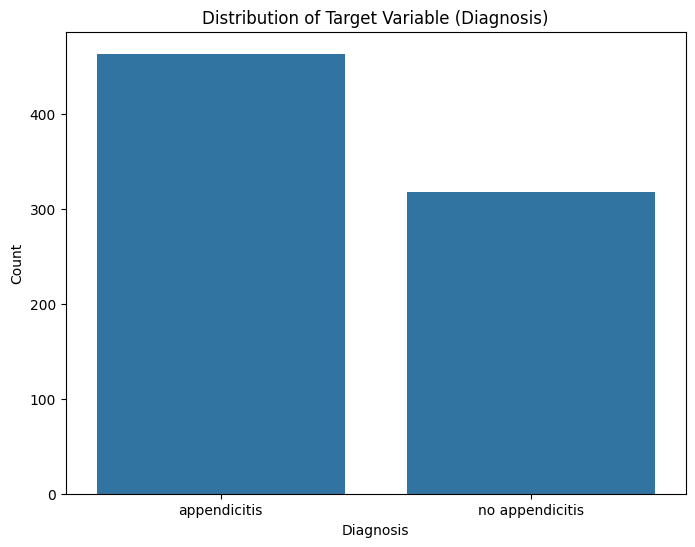

In [27]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=targets)
plt.title('Distribution of Target Variable (Diagnosis)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

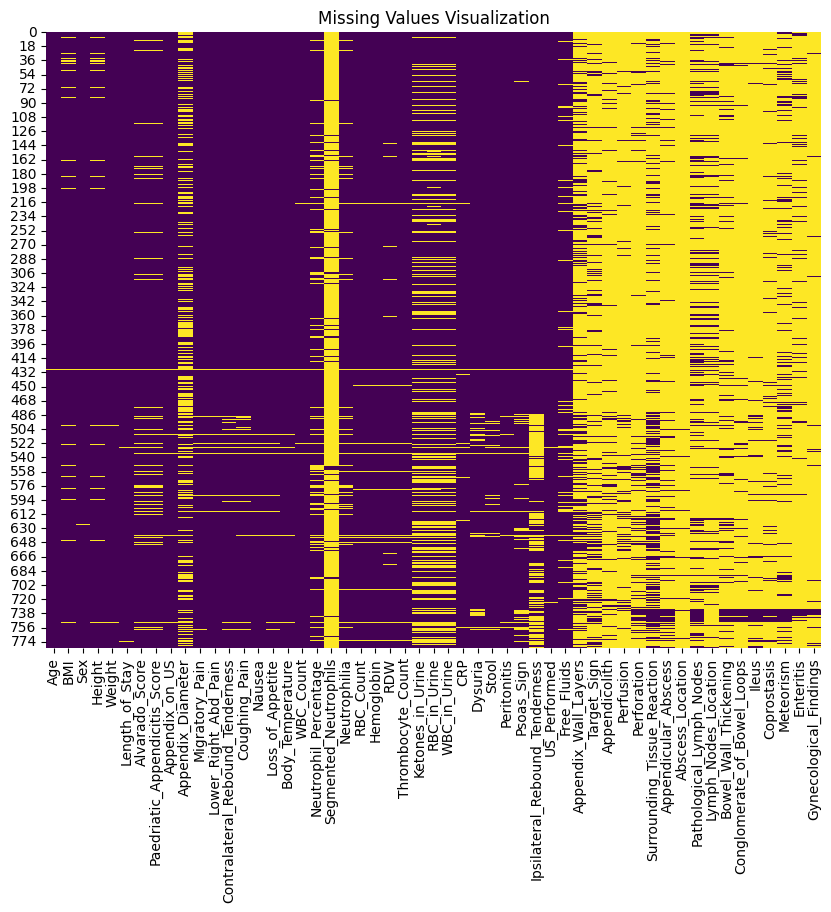

In [28]:
# Plot missing values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

In [29]:
# target
diagnosis = targets[['Diagnosis']].copy()

# Initialize the label encoder to convert 'Diagnosis' to a numeric format
label_encoder = LabelEncoder()

# Encode the 'Diagnosis' column
diagnosis['Diagnosis_encoded'] = label_encoder.fit_transform(diagnosis['Diagnosis'].astype(str))

# Find indexes of rows where 'Diagnosis' is NaN
# nan_indexes = diagnosis['Diagnosis'].isna()

# Remove these rows from 'diagnosis'
diagnosis_cleaned = diagnosis.dropna(subset=['Diagnosis']).copy()

# Filter out corresponding rows from 'features'
features_cleaned = features.loc[diagnosis_cleaned.index].copy()

# Check for empty values in BMI, Height, and Weight columns
missing_bmi = features_cleaned['BMI'].isnull()
missing_height = features_cleaned['Height'].isnull()
missing_weight = features_cleaned['Weight'].isnull()

# Calculate BMI where it is empty
height_in_meters_squared = (features_cleaned['Height'] / 100) ** 2
calculated_bmi = features_cleaned['Weight'] / height_in_meters_squared * 10000

# Replace empty BMI values with calculated BMI
features_cleaned.loc[missing_bmi, 'BMI'] = calculated_bmi[missing_bmi]

# Drop rows where BMI is still empty and either Height or Weight is empty
rows_to_drop_bmi = features_cleaned[missing_bmi & (missing_height | missing_weight)].index
features_cleaned.drop(rows_to_drop_bmi, inplace=True)
diagnosis_cleaned.drop(rows_to_drop_bmi, inplace=True)

# Check for empty values in Sex
missing_sex = features_cleaned['Sex'].isnull()

# Drop rows where Sex is empty
rows_to_drop_sex = features_cleaned[missing_sex].index
features_cleaned.drop(rows_to_drop_sex, inplace=True)
diagnosis_cleaned.drop(rows_to_drop_sex, inplace=True)

# Encode the 'Diagnosis' column and add it as a new column to the DataFrame
diagnosis_cleaned['Diagnosis_encoded'] = label_encoder.fit_transform(diagnosis_cleaned['Diagnosis'])

# Check the transformation and print unique encoded values
print(diagnosis_cleaned[['Diagnosis', 'Diagnosis_encoded']].head())
print(set(diagnosis_cleaned['Diagnosis_encoded']))

         Diagnosis  Diagnosis_encoded
0     appendicitis                  0
1  no appendicitis                  1
2  no appendicitis                  1
3  no appendicitis                  1
4     appendicitis                  0
{0, 1}


In [30]:
# Columns to fill NaN with 'no'
columns_to_fill = ['Appendicular_Abscess', 'Appendicolith', 'Appendix_on_US', 'Conglomerate_of_Bowel_Loops', 'Contralateral_Rebound_Tenderness', 'Coprostasis', 'Coughing_Pain', 'Dysuria',
                  'Enteritis', 'Free_Fluids', 'Ileus', 'Ipsilateral_Rebound_Tenderness', 'Ketones_in_Urine', 'Lower_Right_Abd_Pain', 'Meteorism', 'Migratory_Pain', 'Nausea', 'Neutrophilia', 'Pathological_Lymph_Nodes',
                   'Perfusion', 'Peritonitis', 'Psoas_Sign', 'RBC_in_Urine', 'Stool', 'Surrounding_Tissue_Reaction', 'US_Performed', 'WBC_in_Urine']


# Fill NaN in specified columns with 'no'
features_cleaned[columns_to_fill] = features_cleaned[columns_to_fill].fillna('no')

# Filter out non-numeric columns
non_numeric_cols = features_cleaned.select_dtypes(exclude=['number']).columns

# Print unique non-numeric values for each feature column including NaN
for col in non_numeric_cols:
    print(f"{col} has {features_cleaned[col].nunique(dropna=False)} unique non-numeric values (including NaN):")
    print(features_cleaned[col].value_counts(dropna=False))
    print()

Sex has 2 unique non-numeric values (including NaN):
Sex
male      387
female    367
Name: count, dtype: int64

Appendix_on_US has 2 unique non-numeric values (including NaN):
Appendix_on_US
yes    488
no     266
Name: count, dtype: int64

Migratory_Pain has 2 unique non-numeric values (including NaN):
Migratory_Pain
no     552
yes    202
Name: count, dtype: int64

Lower_Right_Abd_Pain has 2 unique non-numeric values (including NaN):
Lower_Right_Abd_Pain
yes    709
no      45
Name: count, dtype: int64

Contralateral_Rebound_Tenderness has 2 unique non-numeric values (including NaN):
Contralateral_Rebound_Tenderness
no     470
yes    284
Name: count, dtype: int64

Coughing_Pain has 2 unique non-numeric values (including NaN):
Coughing_Pain
no     544
yes    210
Name: count, dtype: int64

Nausea has 2 unique non-numeric values (including NaN):
Nausea
yes    435
no     319
Name: count, dtype: int64

Loss_of_Appetite has 3 unique non-numeric values (including NaN):
Loss_of_Appetite
no     